## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
responses_df = pd.read_csv('responses.csv')
responses_df.head()

,Timestamp,What is your age?,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,How much time do you spend on physical activities in a day?,How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?,Have you ever been a victim of any of these cyber crimes?,Which type of communication do you generally prefer?
0,02-03-2022 17.13,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,3,Fake profiles,through phone
1,02-03-2022 17.18,19,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,less than 1 hr,5,Photos being misused,Text message
2,02-03-2022 17.35,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,5,Hacking,through phone
3,02-03-2022 17.44,19,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,less than 1 hr,2,None of the above,face to face
4,02-03-2022 17.46,18,"Youtube, Instagram",upto 4 hrs,1 - 2.5 hrs,3,None of the above,Text message


In [3]:
responses_df.columns

Index(['Timestamp', 'What is your age?',
       'Which social media platform/s do you like the most or use the most?',
       'How much time do you spend on social media in a day?',
       'How much time do you spend on physical activities in a day?',
       'How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?',
       'Have you ever been a victim of any of these cyber crimes?',
       'Which type of communication do you generally prefer?'],
      dtype='object')

In [4]:
responses_df = responses_df[['What is your age?',
       'Which social media platform/s do you like the most or use the most?',
       'How much time do you spend on social media in a day?',
       'How much time do you spend on physical activities in a day?',
       'How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?',
       'Have you ever been a victim of any of these cyber crimes?',
       'Which type of communication do you generally prefer?']]
responses_df.head()

,What is your age?,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,How much time do you spend on physical activities in a day?,How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?,Have you ever been a victim of any of these cyber crimes?,Which type of communication do you generally prefer?
0,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,3,Fake profiles,through phone
1,19,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,less than 1 hr,5,Photos being misused,Text message
2,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,5,Hacking,through phone
3,19,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,less than 1 hr,2,None of the above,face to face
4,18,"Youtube, Instagram",upto 4 hrs,1 - 2.5 hrs,3,None of the above,Text message


### Creating dataframe only for 18 to 21(young population)

In [6]:
response_1 = responses_df.loc[(responses_df["What is your age?"] >= 18) & (responses_df["What is your age?"] <= 21)]
response_1.head(5)

,What is your age?,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,How much time do you spend on physical activities in a day?,How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?,Have you ever been a victim of any of these cyber crimes?,Which type of communication do you generally prefer?
0,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,3,Fake profiles,through phone
1,19,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,less than 1 hr,5,Photos being misused,Text message
2,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,5,Hacking,through phone
3,19,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,less than 1 hr,2,None of the above,face to face
4,18,"Youtube, Instagram",upto 4 hrs,1 - 2.5 hrs,3,None of the above,Text message


The r-squared is: -0.14168671705664718


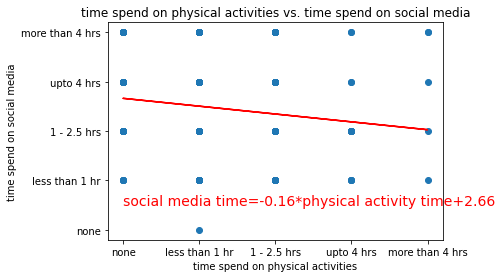

In [7]:
social_media=["none","less than 1 hr","1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"]
social_media_index=[]
physical=["none","less than 1 hr","1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"]
physical_index=[]
for index , row in response_1.iterrows():
    if row['How much time do you spend on social media in a day?']=="none":
        social_media_index.append(0)
    elif row['How much time do you spend on social media in a day?']=="less than 1 hr":
        social_media_index.append(1)
    elif row['How much time do you spend on social media in a day?']=="1 - 2.5 hrs":
        social_media_index.append(2)
    elif row['How much time do you spend on social media in a day?']=="upto 4 hrs":
        social_media_index.append(3)
    else:
        social_media_index.append(4)
    if row['How much time do you spend on physical activities in a day?']=="none":
        physical_index.append(0)
    elif row['How much time do you spend on physical activities in a day?']=="less than 1 hr":
        physical_index.append(1)
    elif row['How much time do you spend on physical activities in a day?']=="1 - 2.5 hrs":
        physical_index.append(2)
    elif row['How much time do you spend on physical activities in a day?']=="upto 4 hrs":
        physical_index.append(3)
    else:
        physical_index.append(4)
plt.scatter(physical_index,social_media_index)       
plt.xlabel("time spend on physical activities")
plt.ylabel("time spend on social media")
plt.title("time spend on physical activities vs. time spend on social media")
x_axis = [v for v in range(len(physical))]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,physical )
y_axis = [v for v in range(len(social_media))]
tick_locations = [value for value in y_axis]
plt.yticks(tick_locations,social_media )
(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(physical_index,social_media_index)
linear_equation="social media time="+str(round(slope,2))+"*"+"physical activity time"+"+"+str(round(intercept,2))
data=pd.DataFrame({
    "physical activity": physical_index,
    "social media activity":social_media_index
})
reg_value=slope*data[["physical activity"]]+intercept
plt.plot(data[["physical activity"]],reg_value,"r-")
print(f"The r-squared is: {rvalue}")
plt.annotate(linear_equation,(0,0.5),color="red",fontsize=14)
plt.savefig('figures/1.png')

In [8]:
[len(physical_index),len(social_media_index)]

[269, 269]

In [9]:
platform_choice = responses_df['Which social media platform/s do you like the most or use the most?']
platform_choice.unique()

array(['Whatsapp, Facebook, Instagram',
       'Whatsapp, Facebook, Youtube, Instagram',
       'Whatsapp, Facebook, Youtube, Twitter', 'Youtube, Instagram',
       'Whatsapp, Youtube, Instagram',
       'Whatsapp, Facebook, Youtube, Twitter, Instagram, Snapchat',
       'Facebook, Twitter', 'Whatsapp, Youtube, Instagram, Hike',
       'Whatsapp', 'Whatsapp, Instagram', 'Youtube',
       'Whatsapp, Facebook, Youtube', 'Instagram',
       'Whatsapp, Facebook, Youtube, Instagram, Snapchat, Tinder',
       'Whatsapp, Youtube', 'Snapchat',
       'Whatsapp, Facebook, Youtube, Twitter, Instagram, Snapchat, Hike, Tinder',
       'Whatsapp, Youtube, Instagram, Snapchat',
       'Whatsapp, Instagram, Snapchat',
       'Whatsapp, Facebook, Instagram, Snapchat',
       'Whatsapp, Facebook, Instagram, Hike',
       'Whatsapp, Facebook, Youtube, Twitter, Instagram, Snapchat, Hike',
       'Facebook, Youtube, Instagram',
       'Whatsapp, Facebook, Youtube, Instagram, Snapchat', 'Twitter',
       '

In [10]:
platform_choice = responses_df['Which social media platform/s do you like the most or use the most?']
platform_choice = platform_choice.str.split(',', expand=True)
platform_choice.head()

,0,1,2,3,4,5,6,7
0,Whatsapp,Facebook,Instagram,None,None,None,None,None
1,Whatsapp,Facebook,Youtube,Instagram,None,None,None,None
2,Whatsapp,Facebook,Instagram,None,None,None,None,None
3,Whatsapp,Facebook,Youtube,Twitter,None,None,None,None
4,Youtube,Instagram,None,None,None,None,None,None


In [11]:
platform_choice = responses_df['Which social media platform/s do you like the most or use the most?']

facebook = 0
whatsapp = 0
instagram = 0
twitter = 0
youtube = 0
snapchat = 0
other = 0

for i in range(0,len(platform_choice)):
    if platform_choice[i].count('Facebook') > 0:
        facebook = facebook + 1
    if platform_choice[i].count('Whatsapp') > 0:
        whatsapp = whatsapp + 1
    if platform_choice[i].count('Instagram') > 0:
        instagram = instagram + 1
    if platform_choice[i].count('Twitter') > 0:
        twitter = twitter + 1
    if platform_choice[i].count('Youtube') > 0:
        youtube = youtube + 1
    if platform_choice[i].count('Snapchat') > 0:
        snapchat = snapchat + 1
    if platform_choice[i].count('Hike') > 0:
        other = other + 1
    if platform_choice[i].count('Tinder') > 0:
        other = other + 1
        
platform_choice_count = {"Facebook" : facebook,
                         "Whatsapp" : whatsapp,
                         "Instagram" : instagram,
                         "Twitter" : twitter,
                         "Youtube" : youtube,
                         "Snapchat" : snapchat,
                         "Other" : other}
platform_choice_count 

{'Facebook': 120,
 'Whatsapp': 207,
 'Instagram': 164,
 'Twitter': 29,
 'Youtube': 162,
 'Snapchat': 48,
 'Other': 28}

In [12]:
crime_df = responses_df['Have you ever been a victim of any of these cyber crimes?']
crime_df.unique()

array(['Fake profiles', 'Photos being misused', 'Hacking',
       'None of the above', 'Photos being misused, Fake profiles',
       'Hacking, Photos being misused',
       'Fake profiles, None of the above',
       'Hacking, Photos being misused, Fake profiles',
       'Hacking, Fake profiles'], dtype=object)

In [13]:
crime_df = crime_df.replace(to_replace ="Fake profiles, None of the above", value ="Fake profiles") 
crime_df.unique()

array(['Fake profiles', 'Photos being misused', 'Hacking',
       'None of the above', 'Photos being misused, Fake profiles',
       'Hacking, Photos being misused',
       'Hacking, Photos being misused, Fake profiles',
       'Hacking, Fake profiles'], dtype=object)

In [14]:
fake = 0
photo_misuse = 0
hacking = 0
none = 0

for i in range(0,len(crime_df)):
    if crime_df[i].count('Fake profiles') > 0:
        fake = fake + 1
    if crime_df[i].count('Photos being misused') > 0:
        photo_misuse = photo_misuse + 1
    if crime_df[i].count('Hacking') > 0:
        hacking = hacking + 1
    if crime_df[i].count('None of the above') > 0:
        none = none + 1

crime_count = {"Fake profiles" : fake,
               "Photos being misused" : photo_misuse,
               "Hacking" : hacking,
               "None of the above" : none}
crime_count 

{'Fake profiles': 46,
 'Photos being misused': 12,
 'Hacking': 20,
 'None of the above': 224}

In [15]:
preferred_com = responses_df['Which type of communication do you generally prefer?']
preferred_com.unique()

array(['through phone', 'Text message', 'face to face',
       'face to face, Text message',
       'face to face, through phone, through social media',
       'face to face, through phone',
       'face to face, through phone, Text message',
       'face to face, through phone, Text message, through social media',
       'face to face, through social media', 'through social media',
       'Text message, through social media',
       'through phone, through social media'], dtype=object)

In [16]:
preferred_com.value_counts()

face to face                                                       136
Text message                                                        36
face to face, through phone                                         28
through social media                                                22
through phone                                                       19
face to face, through phone, Text message, through social media     15
face to face, Text message                                           8
face to face, through phone, Text message                            8
face to face, through social media                                   8
face to face, through phone, through social media                    5
Text message, through social media                                   4
through phone, through social media                                  2
Name: Which type of communication do you generally prefer?, dtype: int64

In [17]:
face = 0
text = 0
phone = 0
social = 0

for i in range(0,len(preferred_com)):
    if preferred_com[i].count('face to face') > 0:
        face = face + 1
    if preferred_com[i].count('Text message') > 0:
        text = text + 1
    if preferred_com[i].count('through phone') > 0:
        phone = phone + 1
    if preferred_com[i].count('through social media') > 0:
        social = social + 1
        
preferred_com_count = {"Face to face" : face,
               "Text message" : text,
               "through phone" : phone,
               "through social media" : social}
preferred_com_count

{'Face to face': 208,
 'Text message': 71,
 'through phone': 77,
 'through social media': 56}

In [18]:
responses_df

,What is your age?,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,How much time do you spend on physical activities in a day?,How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?,Have you ever been a victim of any of these cyber crimes?,Which type of communication do you generally prefer?
0,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,3,Fake profiles,through phone
1,19,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,less than 1 hr,5,Photos being misused,Text message
2,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,5,Hacking,through phone
3,19,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,less than 1 hr,2,None of the above,face to face
4,18,"Youtube, Instagram",upto 4 hrs,1 - 2.5 hrs,3,None of the above,Text message
...,...,...,...,...,...,...,...
286,19,"Whatsapp, Facebook, Youtube, Instagram, Hike",1 - 2.5 hrs,none,5,None of the above,"face to face, through social media"
287,18,Instagram,upto 4 hrs,1 - 2.5 hrs,10,None of the above,"through phone, through social media"
288,18,Whatsapp,1 - 2.5 hrs,1 - 2.5 hrs,4,Hacking,through social media
289,19,"Whatsapp, Youtube, Twitter",more than 4 hrs,less than 1 hr,3,None of the above,through social media


In [19]:
responses_df1=responses_df[["Which social media platform/s do you like the most or use the most?","How much time do you spend on social media in a day?","Which type of communication do you generally prefer?"]]
responses_df1["Whatsapp"]=""
responses_df1["Facebook"]=""
responses_df1["Youtube"]=""
responses_df1["Instagram"]=""
responses_df1["Twitter"]=""
responses_df1["Snapchat"]=""
responses_df1["Hike"]=""
responses_df1["Tinder"]=""
responses_df1.head(7)

for index , row in responses_df1.iterrows():
    if "Whatsapp" in row['Which social media platform/s do you like the most or use the most?']:
        row["Whatsapp"]=1
    else:
        row["Whatsapp"]=0
    if "Facebook" in row['Which social media platform/s do you like the most or use the most?']:
        row["Facebook"]=1
    else:
        row["Facebook"]=0
    if "Youtube" in row['Which social media platform/s do you like the most or use the most?']:
        row["Youtube"]=1
    else:
        row["Youtube"]=0
    if "Instagram" in row['Which social media platform/s do you like the most or use the most?']:
        row["Instagram"]=1
    else:
        row["Instagram"]=0   
    if "Twitter" in row['Which social media platform/s do you like the most or use the most?']:
        row["Twitter"]=1
    else:
        row["Twitter"]=0 
    if "Snapchat" in row['Which social media platform/s do you like the most or use the most?']:
        row["Snapchat"]=1
    else:
        row["Snapchat"]=0
    if "Hike" in row['Which social media platform/s do you like the most or use the most?']:
        row["Hike"]=1
    else:
        row["Hike"]=0
    if "Tinder" in row['Which social media platform/s do you like the most or use the most?']:
        row["Tinder"]=1
    else:
        row["Tinder"]=0
responses_df1.head()
    

C:\Users\ram\AppData\Local\Temp/ipykernel_14212/3265223494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_df1["Whatsapp"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/3265223494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_df1["Facebook"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/3265223494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,Which type of communication do you generally prefer?,Whatsapp,Facebook,Youtube,Instagram,Twitter,Snapchat,Hike,Tinder
0,"Whatsapp, Facebook, Instagram",upto 4 hrs,through phone,1,1,0,1,0,0,0,0
1,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,Text message,1,1,1,1,0,0,0,0
2,"Whatsapp, Facebook, Instagram",upto 4 hrs,through phone,1,1,0,1,0,0,0,0
3,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,face to face,1,1,1,0,1,0,0,0
4,"Youtube, Instagram",upto 4 hrs,Text message,0,0,1,1,0,0,0,0


In [20]:
responses_df2=responses_df1[["How much time do you spend on social media in a day?","Whatsapp","Facebook","Youtube","Instagram","Twitter","Snapchat","Hike","Tinder"]]
responses_df2_g=responses_df2.groupby("How much time do you spend on social media in a day?")
responses_df2_groupby=responses_df2_g.sum()
responses_df2_groupby=responses_df2_groupby.reindex(["none", "less than 1 hr", "1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"])
responses_df2_groupby

,Whatsapp,Facebook,Youtube,Instagram,Twitter,Snapchat,Hike,Tinder
How much time do you spend on social media in a day?,,,,,,,,
none,1,0,0,0,0,0,0,0
less than 1 hr,32,15,17,23,3,5,3,0
1 - 2.5 hrs,84,41,67,62,14,19,6,1
upto 4 hrs,53,32,45,47,9,12,8,3
more than 4 hrs,37,32,33,32,3,12,5,2


In [21]:

responses_11=response_1[["Which social media platform/s do you like the most or use the most?","How much time do you spend on social media in a day?"]]
responses_11["Whatsapp"]=""
responses_11["Facebook"]=""
responses_11["Youtube"]=""
responses_11["Instagram"]=""
responses_11["Twitter"]=""
responses_11["Snapchat"]=""
responses_11["Hike"]=""
responses_11["Tinder"]=""
responses_11.head(7)
for index , row in responses_11.iterrows():
    if "Whatsapp" in row['Which social media platform/s do you like the most or use the most?']:
        row["Whatsapp"]=1
    else:
        row["Whatsapp"]=0
    if "Facebook" in row['Which social media platform/s do you like the most or use the most?']:
        row["Facebook"]=1
    else:
        row["Facebook"]=0
    if "Youtube" in row['Which social media platform/s do you like the most or use the most?']:
        row["Youtube"]=1
    else:
        row["Youtube"]=0
    if "Instagram" in row['Which social media platform/s do you like the most or use the most?']:
        row["Instagram"]=1
    else:
        row["Instagram"]=0   
    if "Twitter" in row['Which social media platform/s do you like the most or use the most?']:
        row["Twitter"]=1
    else:
        row["Twitter"]=0 
    if "Snapchat" in row['Which social media platform/s do you like the most or use the most?']:
        row["Snapchat"]=1
    else:
        row["Snapchat"]=0
    if "Hike" in row['Which social media platform/s do you like the most or use the most?']:
        row["Hike"]=1
    else:
        row["Hike"]=0
    if "Tinder" in row['Which social media platform/s do you like the most or use the most?']:
        row["Tinder"]=1
    else:
        row["Tinder"]=0
responses_11.head()

C:\Users\ram\AppData\Local\Temp/ipykernel_14212/191744342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_11["Whatsapp"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/191744342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_11["Facebook"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/191744342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,Whatsapp,Facebook,Youtube,Instagram,Twitter,Snapchat,Hike,Tinder
0,"Whatsapp, Facebook, Instagram",upto 4 hrs,1,1,0,1,0,0,0,0
1,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,1,1,1,1,0,0,0,0
2,"Whatsapp, Facebook, Instagram",upto 4 hrs,1,1,0,1,0,0,0,0
3,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,1,1,1,0,1,0,0,0
4,"Youtube, Instagram",upto 4 hrs,0,0,1,1,0,0,0,0


In [22]:
responses_2=responses_11[["How much time do you spend on social media in a day?","Whatsapp","Facebook","Youtube","Instagram","Twitter","Snapchat","Hike","Tinder"]]
responses_2_g=responses_2.groupby("How much time do you spend on social media in a day?")
responses_2_groupby=responses_2_g.sum()
print(responses_2_groupby.index)
responses_2_groupby=responses_2_groupby.reindex(["none", "less than 1 hr", "1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"])
responses_2_groupby

Index(['1 - 2.5 hrs', 'less than 1 hr', 'more than 4 hrs', 'none',
       'upto 4 hrs'],
      dtype='object', name='How much time do you spend on social media in a day?')


,Whatsapp,Facebook,Youtube,Instagram,Twitter,Snapchat,Hike,Tinder
How much time do you spend on social media in a day?,,,,,,,,
none,1,0,0,0,0,0,0,0
less than 1 hr,30,14,16,23,2,5,3,0
1 - 2.5 hrs,78,32,56,55,12,17,6,1
upto 4 hrs,50,29,44,45,9,11,8,3
more than 4 hrs,37,30,32,32,3,12,5,2


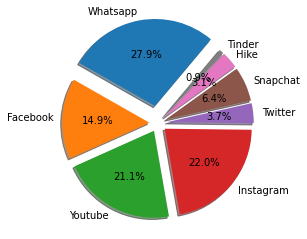

In [23]:
responses_2_groupby[["Whatsapp"]].sum()[0]
explode=[0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
user_count=[]
platform=[]
for v in responses_2_groupby.columns:
    user_count.append(responses_2_groupby[[v]].sum()[0])
    platform.append(v)
plt.pie(user_count,labels=platform,explode=explode,autopct="%1.1f%%", shadow=True, startangle=50)
plt.savefig('figures/2.png')

### Plot time spend on social media vs number of people use Whatsapp the most

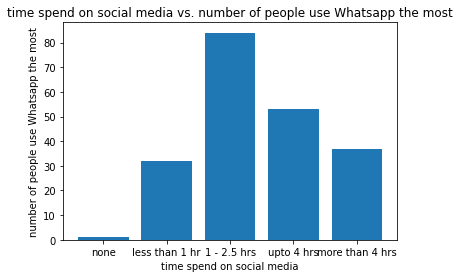

In [25]:
x_axis = np.arange(len(responses_df2_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Whatsapp"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Whatsapp the most")
plt.title("time spend on social media vs. number of people use Whatsapp the most")
plt.savefig('figures/3.png')

### Plot time spend on social media vs number of people use Whatsapp the most with regression
### Plot regression line

The r-squared is: 0.5166582904350924
The p-value is: 0.3727373436611069


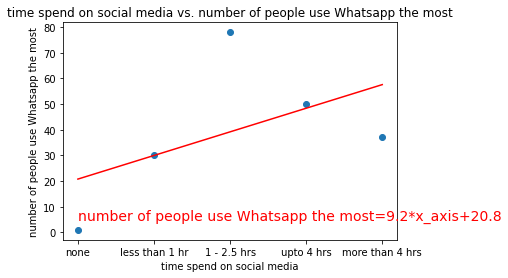

In [24]:
x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Whatsapp"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Whatsapp"]].to_numpy().tolist()])
linear_equation="number of people use Whatsapp the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,5),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Whatsapp the most")
plt.title("time spend on social media vs. number of people use Whatsapp the most")
plt.savefig('figures/4.png')

### Plot time spend on social media vs number of people use Facebook the most

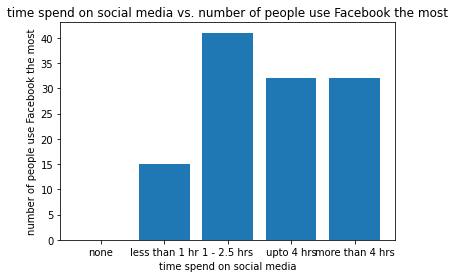

In [26]:
x_axis = np.arange(len(responses_df2_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Facebook"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Facebook the most")
plt.title("time spend on social media vs. number of people use Facebook the most")
plt.savefig('figures/5.png')

### Plot time spend on social media vs number of people use Facebook the most with regression
### Plot regression line

The r-squared is: 0.8625819491779427
The p-value is: 0.05987406283880404


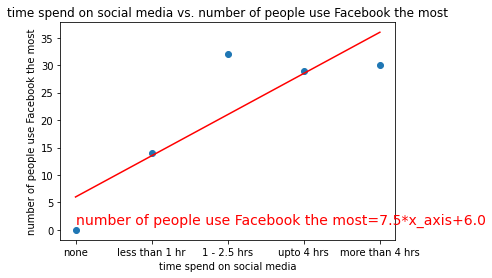

In [27]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Facebook"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Facebook"]].to_numpy().tolist()])
linear_equation="number of people use Facebook the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Facebook the most")
plt.title("time spend on social media vs. number of people use Facebook the most")
plt.savefig('figures/6.png')

### Plot time spend on social media vs number of people use Youtube the most

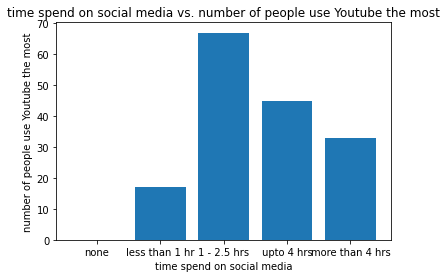

In [28]:

x_axis = np.arange(len(responses_df2_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Youtube"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Youtube the most")
plt.title("time spend on social media vs. number of people use Youtube the most")
plt.savefig('figures/7.png')

### Plot time spend on social media vs number of people use Youtube the most with regression
### Plot regression line

The r-squared is: 0.6552733146429183
The p-value is: 0.229987683005459


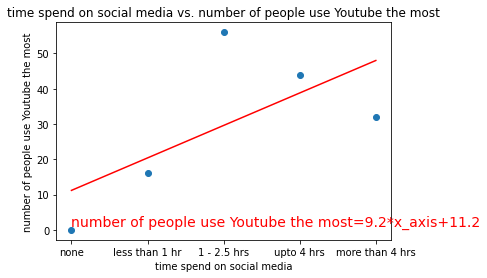

In [28]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Youtube"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Youtube"]].to_numpy().tolist()])
linear_equation="number of people use Youtube the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Youtube the most")
plt.title("time spend on social media vs. number of people use Youtube the most")
plt.savefig('figures/8.png')

### Plot time spend on social media vs number of people use Instagram the most

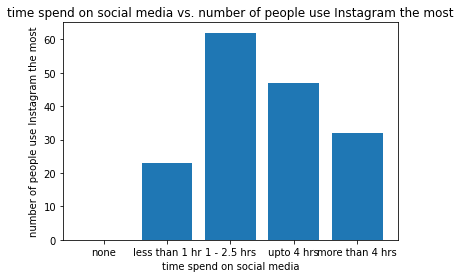

In [29]:

x_axis = np.arange(len(responses_df2_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Instagram"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Instagram the most")
plt.title("time spend on social media vs. number of people use Instagram the most")
plt.savefig('figures/9.png')

### Plot time spend on social media vs number of people use Instagram the most with regression
### Plot regression line

The r-squared is: 0.6413625651168449
The p-value is: 0.24347252395156574


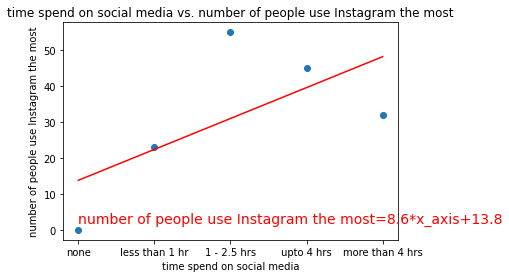

In [30]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Instagram"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Instagram"]].to_numpy().tolist()])
linear_equation="number of people use Instagram the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,2),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Instagram the most")
plt.title("time spend on social media vs. number of people use Instagram the most")
plt.savefig('figures/10.png')

### Plot time spend on social media vs number of people use Twitter the most

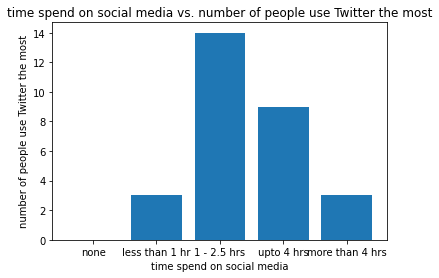

In [31]:

x_axis = np.arange(len(responses_df2_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Twitter"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Twitter the most")
plt.title("time spend on social media vs. number of people use Twitter the most")
plt.savefig('figures/11.png')

### Plot time spend on social media vs number of people use Twitter the most with regression
### Plot regression line

The r-squared is: 0.40545886000867354
The p-value is: 0.49826971968704953


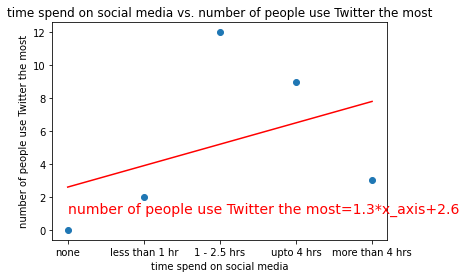

In [32]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Twitter"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Twitter"]].to_numpy().tolist()])
linear_equation="number of people use Twitter the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Twitter the most")
plt.title("time spend on social media vs. number of people use Twitter the most")
plt.savefig('figures/12.png')

### Plot time spend on social media vs number of people use Snapchat the most

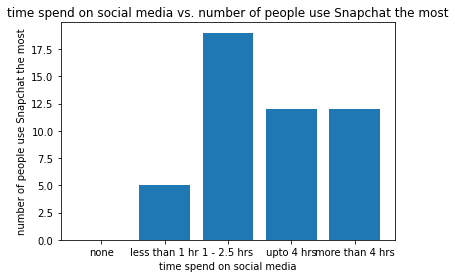

In [33]:

x_axis = np.arange(len(responses_df2_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Snapchat"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Snapchat the most")
plt.title("time spend on social media vs. number of people use Snapchat the most")
plt.savefig('figures/13.png')

### Plot time spend on social media vs number of people use Snapchat the most with regression
### Plot regression line

The r-squared is: 0.7191949522280761
The p-value is: 0.17090103561932743


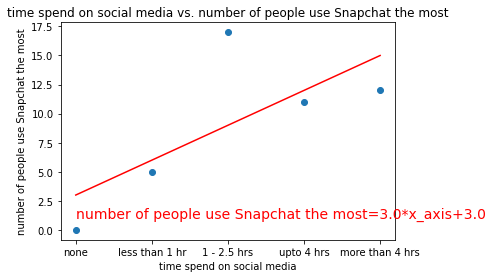

In [34]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Snapchat"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Snapchat"]].to_numpy().tolist()])
linear_equation="number of people use Snapchat the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Snapchat the most")
plt.title("time spend on social media vs. number of people use Snapchat the most")
plt.savefig('figures/14.png')

### Plot time spend on social media vs number of people use Hike the most

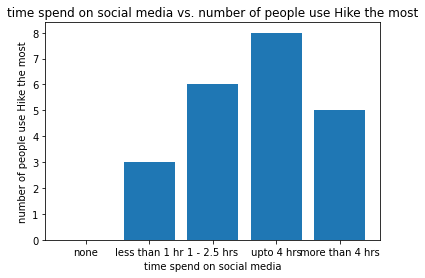

In [32]:

x_axis = np.arange(len(responses_df2_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Hike"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Hike the most")
plt.title("time spend on social media vs. number of people use Hike the most")
plt.savefig('figures/15.png')

### Plot time spend on social media vs number of people use Hike the most with regression
### Plot regression line

The r-squared is: 0.7777137710478189
The pvalue is: 0.12152456351760468


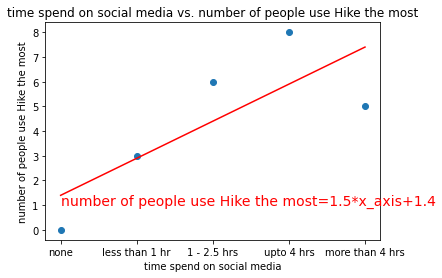

In [33]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Hike"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Hike"]].to_numpy().tolist()])
linear_equation="number of people use Hike the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Hike the most")
plt.title("time spend on social media vs. number of people use Hike the most")
plt.savefig('figures/16.png')

### Create table counting mention of prefered communication type for 18 to 21(young population)

In [34]:

responses_3=response_1[["Which type of communication do you generally prefer?","How much time do you spend on social media in a day?"]]
responses_3["through phone"]=""
responses_3["Text message"]=""
responses_3["face to face"]=""
responses_3["through social media"]=""
responses_3.head(7)

for index , row in responses_3.iterrows():
    if "through phone" in row['Which type of communication do you generally prefer?']:
        row["through phone"]=1
    else:
        row["through phone"]=0
    if "Text message" in row['Which type of communication do you generally prefer?']:
        row["Text message"]=1
    else:
        row["Text message"]=0
    if "face to face" in row['Which type of communication do you generally prefer?']:
        row["face to face"]=1
    else:
        row["face to face"]=0
    if "through social media" in row['Which type of communication do you generally prefer?']:
        row["through social media"]=1
    else:
        row["through social media"]=0   
    
responses_3.head()

C:\Users\ram\AppData\Local\Temp/ipykernel_14212/1994629845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_3["through phone"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/1994629845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_3["Text message"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/1994629845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Which type of communication do you generally prefer?,How much time do you spend on social media in a day?,through phone,Text message,face to face,through social media
0,through phone,upto 4 hrs,1,0,0,0
1,Text message,more than 4 hrs,0,1,0,0
2,through phone,upto 4 hrs,1,0,0,0
3,face to face,1 - 2.5 hrs,0,0,1,0
4,Text message,upto 4 hrs,0,1,0,0


### Rearrange index 

In [36]:

responses_4=responses_3[["How much time do you spend on social media in a day?","through phone","Text message","face to face","through social media"]]
responses_4_g=responses_4.groupby("How much time do you spend on social media in a day?")
responses_4_groupby=responses_4_g.sum()
print(responses_4_groupby.index)
responses_4_groupby=responses_4_groupby.reindex(["none", "less than 1 hr", "1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"])
responses_4_groupby

Index(['1 - 2.5 hrs', 'less than 1 hr', 'more than 4 hrs', 'none',
       'upto 4 hrs'],
      dtype='object', name='How much time do you spend on social media in a day?')


,through phone,Text message,face to face,through social media
How much time do you spend on social media in a day?,,,,
none,0,0,1,0
less than 1 hr,6,10,35,2
1 - 2.5 hrs,24,26,81,11
upto 4 hrs,23,14,50,19
more than 4 hrs,16,15,30,18


### Plot time spend on social media vs number of people use Tinder the most with regression
### Plot regression line

The r-squared is: 0.8488746876271654
The pvalue is: 0.06890350891195704


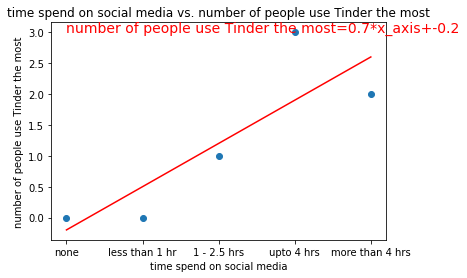

In [37]:

x_axis = np.arange(len(responses_2_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_2_groupby[["Tinder"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_2_groupby[["Tinder"]].to_numpy().tolist()])
linear_equation="number of people use Tinder the most="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,3),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_2_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Tinder the most")
plt.title("time spend on social media vs. number of people use Tinder the most")
plt.savefig('figures/17.png')

### Plot time spend on social media vs number of people use Tinder the most

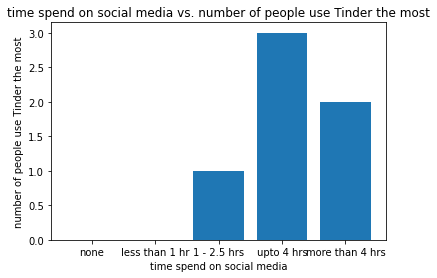

In [40]:

x_axis = np.arange(len(responses_df2_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df2_groupby[["Tinder"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df2_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("number of people use Tinder the most")
plt.title("time spend on social media vs. number of people use Tinder the most")
plt.savefig('figures/18.png')

### Share of people with certain platform perference base on hour spend on social media for 18 to 21(young population)

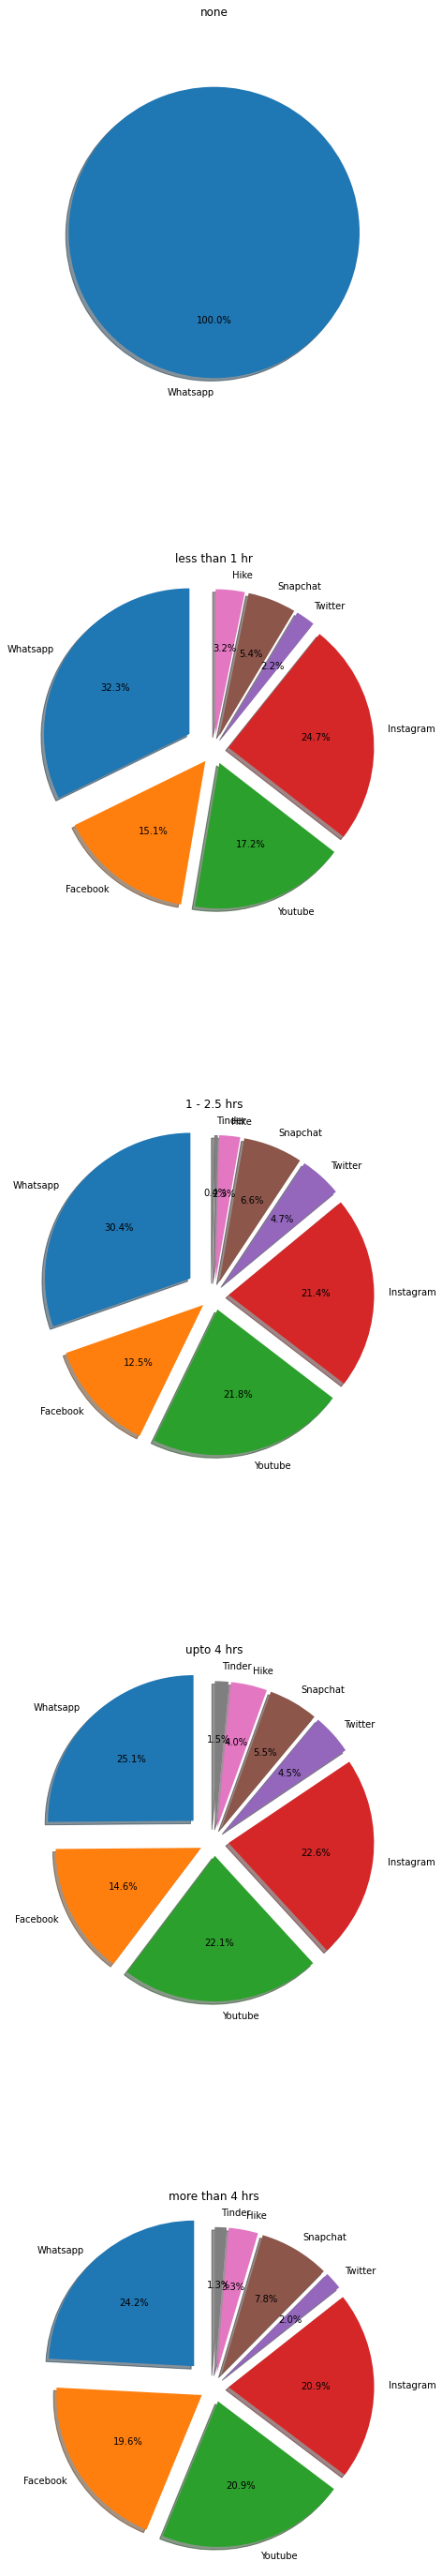

In [38]:

responses_21_groupby= responses_2_groupby.div(responses_2_groupby.sum(axis=1), axis=0)
def my_autopct(pct):
    return ('%1.1f%%'% pct) if pct > 0 else ''
fig, axs = plt.subplots(nrows=responses_21_groupby.index.size, ncols=1, figsize=(50,50))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

i=0
for row in range(responses_21_groupby.index.size ):
    count_list=[]
    name_list=[]
    [count_list.append(responses_21_groupby.loc[responses_21_groupby.index[row],:][i]) for i in range(len(responses_21_groupby.loc[responses_21_groupby.index[row],:])) if responses_21_groupby.loc[responses_21_groupby.index[row],:][i]>0]
    [name_list.append(responses_21_groupby.loc[responses_21_groupby.index[row],:].index[i]) for i in range(len(responses_21_groupby.loc[responses_21_groupby.index[row],:])) if responses_21_groupby.loc[responses_21_groupby.index[row],:][i]>0]
    fig.add_subplot(axs[row] )
    plt.pie(count_list, labels=name_list,autopct=my_autopct, explode=[0.2]+[0.1]*(len(name_list)-1),shadow=True, startangle=90)
    plt.axis('off')
    plt.title(responses_21_groupby.index[i])
    i=i+1
plt.savefig('figures/19.png')

### Compare NO. of people with different platform preference base on hours spend on social media per day

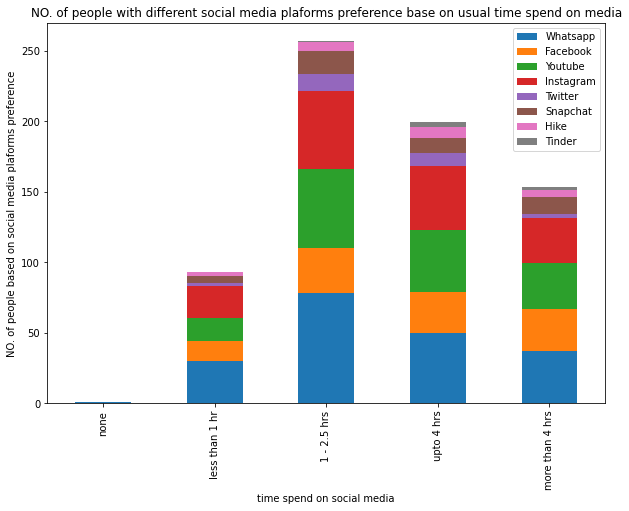

In [39]:

platform_stack=responses_2_groupby.plot.bar(stacked=True, figsize=(10,7),title="NO. of people with different social media plaforms preference base on usual time spend on media") 
platform_stack.set_xlabel("time spend on social media") 
platform_stack.set_ylabel("NO. of people based on social media plaforms preference")
plt.savefig('figures/20.png')




In [40]:
responses_df["Which type of communication do you generally prefer?"].unique()

array(['through phone', 'Text message', 'face to face',
       'face to face, Text message',
       'face to face, through phone, through social media',
       'face to face, through phone',
       'face to face, through phone, Text message',
       'face to face, through phone, Text message, through social media',
       'face to face, through social media', 'through social media',
       'Text message, through social media',
       'through phone, through social media'], dtype=object)

In [41]:
responses_df3=responses_df[["Which type of communication do you generally prefer?","How much time do you spend on social media in a day?"]]
responses_df3["through phone"]=""
responses_df3["Text message"]=""
responses_df3["face to face"]=""
responses_df3["through social media"]=""
responses_df3.head(7)

for index , row in responses_df3.iterrows():
    if "through phone" in row['Which type of communication do you generally prefer?']:
        row["through phone"]=1
    else:
        row["through phone"]=0
    if "Text message" in row['Which type of communication do you generally prefer?']:
        row["Text message"]=1
    else:
        row["Text message"]=0
    if "face to face" in row['Which type of communication do you generally prefer?']:
        row["face to face"]=1
    else:
        row["face to face"]=0
    if "through social media" in row['Which type of communication do you generally prefer?']:
        row["through social media"]=1
    else:
        row["through social media"]=0   
    
responses_df3.head(10)
    

C:\Users\ram\AppData\Local\Temp/ipykernel_14212/1868801065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_df3["through phone"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/1868801065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_df3["Text message"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/1868801065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Which type of communication do you generally prefer?,How much time do you spend on social media in a day?,through phone,Text message,face to face,through social media
0,through phone,upto 4 hrs,1,0,0,0
1,Text message,more than 4 hrs,0,1,0,0
2,through phone,upto 4 hrs,1,0,0,0
3,face to face,1 - 2.5 hrs,0,0,1,0
4,Text message,upto 4 hrs,0,1,0,0
5,"face to face, Text message",upto 4 hrs,0,1,1,0
6,face to face,1 - 2.5 hrs,0,0,1,0
7,through phone,more than 4 hrs,1,0,0,0
8,through phone,upto 4 hrs,1,0,0,0
9,face to face,1 - 2.5 hrs,0,0,1,0


### Create table counting mention of prefered communication type for all data

In [42]:

responses_df4=responses_df3[["How much time do you spend on social media in a day?","through phone","Text message","face to face","through social media"]]
responses_df4_g=responses_df4.groupby("How much time do you spend on social media in a day?")
responses_df4_groupby=responses_df4_g.sum()
print(responses_df4_groupby.index)
responses_df4_groupby=responses_df4_groupby.reindex(["none", "less than 1 hr", "1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"])
responses_df4_groupby

Index(['1 - 2.5 hrs', 'less than 1 hr', 'more than 4 hrs', 'none',
       'upto 4 hrs'],
      dtype='object', name='How much time do you spend on social media in a day?')


,through phone,Text message,face to face,through social media
How much time do you spend on social media in a day?,,,,
none,0,0,1,0
less than 1 hr,8,10,38,2
1 - 2.5 hrs,29,31,89,14
upto 4 hrs,24,14,50,21
more than 4 hrs,16,16,30,19


### Plot time spend on social media vs No. of people prefer communication through phone

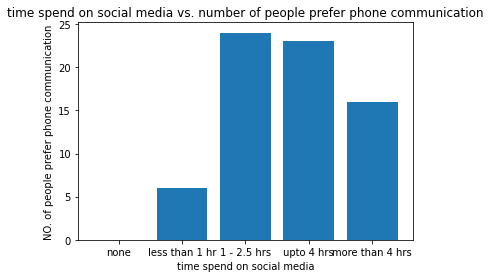

In [43]:

x_axis = np.arange(len(responses_4_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_4_groupby[["through phone"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_4_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("NO. of people prefer phone communication")
plt.title("time spend on social media vs. number of people prefer phone communication")
plt.savefig('figures/21.png')

### Plot time spend on social media vs No. of people prefer communication through phone with regression
### Plot regression line

The r-squared is: 0.7347061762824825
The pvalue is: 0.15733986434929292


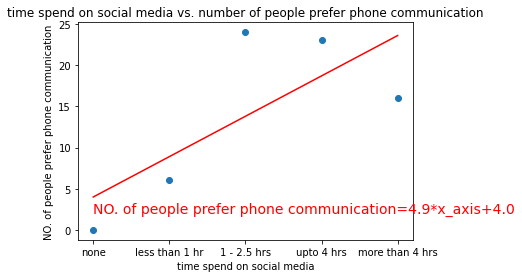

In [44]:

x_axis = np.arange(len(responses_4_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_4_groupby[["through phone"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_4_groupby[["through phone"]].to_numpy().tolist()])
linear_equation="NO. of people prefer phone communication="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,2),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_4_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("NO. of people prefer phone communication")
plt.title("time spend on social media vs. number of people prefer phone communication")
plt.savefig('figures/22.png')


### Plot time spend on social media vs No. of people prefer communication through text message

<Figure size 720x720 with 0 Axes>

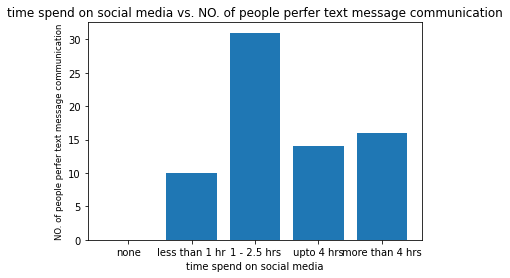

<Figure size 720x720 with 0 Axes>

In [45]:

x_axis = np.arange(len(responses_df4_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df4_groupby[["Text message"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df4_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("NO. of people perfer text message communication",fontsize=8.5)
plt.title("time spend on social media vs. NO. of people perfer text message communication")
plt.savefig('figures/23.png')
plt.figure(figsize=(10,10))


### Plot time spend on social media vs No. of people prefer communication through text message with regression
### Plot regression line

The r-squared is: 0.5730698830937558
The pvalue is: 0.312526097555819


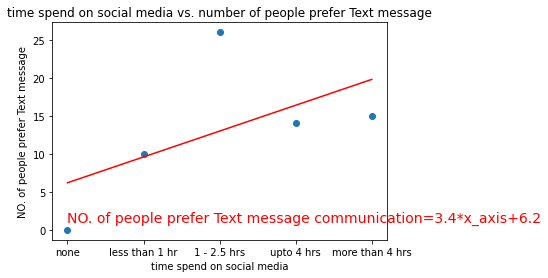

In [46]:

x_axis = np.arange(len(responses_4_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_4_groupby[["Text message"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_4_groupby[["Text message"]].to_numpy().tolist()])
linear_equation="NO. of people prefer Text message communication="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_4_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("NO. of people prefer Text message")
plt.title("time spend on social media vs. number of people prefer Text message")
plt.savefig('figures/24.png')

### Plot time spend on social media vs No. of people prefer face to face communication

<Figure size 720x504 with 0 Axes>

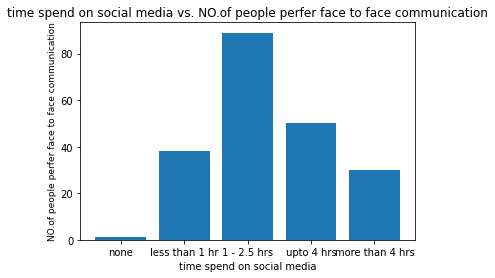

<Figure size 720x504 with 0 Axes>

In [50]:

x_axis = np.arange(len(responses_df4_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df4_groupby[["face to face"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df4_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("NO.of people perfer face to face communication",fontsize=9)
plt.title("time spend on social media vs. NO.of people perfer face to face communication")
plt.savefig('figures/25.png')
plt.figure(figsize=(10,7))


### Plot time spend on social media vs No. of people prefer face to face communication with regression
### Plot regression line

The r-squared is: 0.39443903937937397
The pvalue is: 0.511129446116336


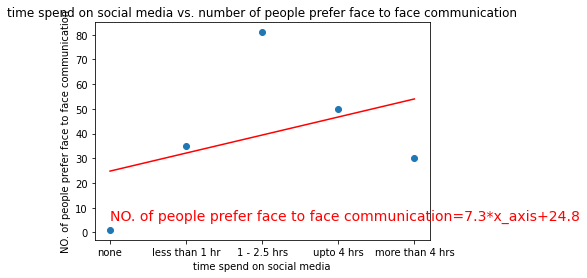

In [47]:

x_axis = np.arange(len(responses_4_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_4_groupby[["face to face"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]



(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_4_groupby[["face to face"]].to_numpy().tolist()])
linear_equation="NO. of people prefer face to face communication="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,5),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_4_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("NO. of people prefer face to face communication")
plt.title("time spend on social media vs. number of people prefer face to face communication")
plt.savefig('figures/26.png')


### Plot time spend on social media vs No. of people prefer communication through social media

<Figure size 720x504 with 0 Axes>

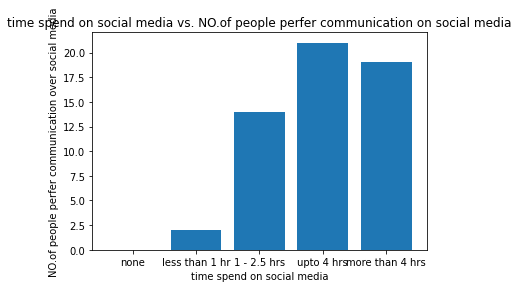

<Figure size 720x504 with 0 Axes>

In [49]:

x_axis = np.arange(len(responses_df4_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df4_groupby[["through social media"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df4_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("NO.of people perfer communication over social media")
plt.title("time spend on social media vs. NO.of people perfer communication on social media")
plt.savefig('figures/27.png')
plt.figure(figsize=(10,7))


### Plot time spend on social media vs No. of people prefer through social media communication with regression
### Plot regression line

The r-squared is: 0.9519081007419071
The pvalue is: 0.012568510435433328


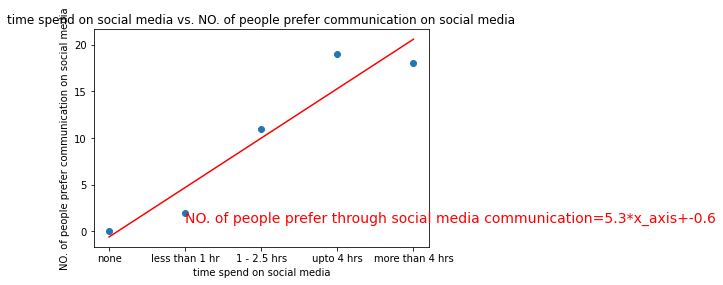

In [53]:

x_axis = np.arange(len(responses_4_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_4_groupby[["through social media"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]



(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_4_groupby[["through social media"]].to_numpy().tolist()])
linear_equation="NO. of people prefer through social media communication="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(1,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_4_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("NO. of people prefer communication on social media")
plt.title("time spend on social media vs. NO. of people prefer communication on social media")
plt.savefig('figures/28.png')


### Share of people with certain communication perference base on hour spend on social media

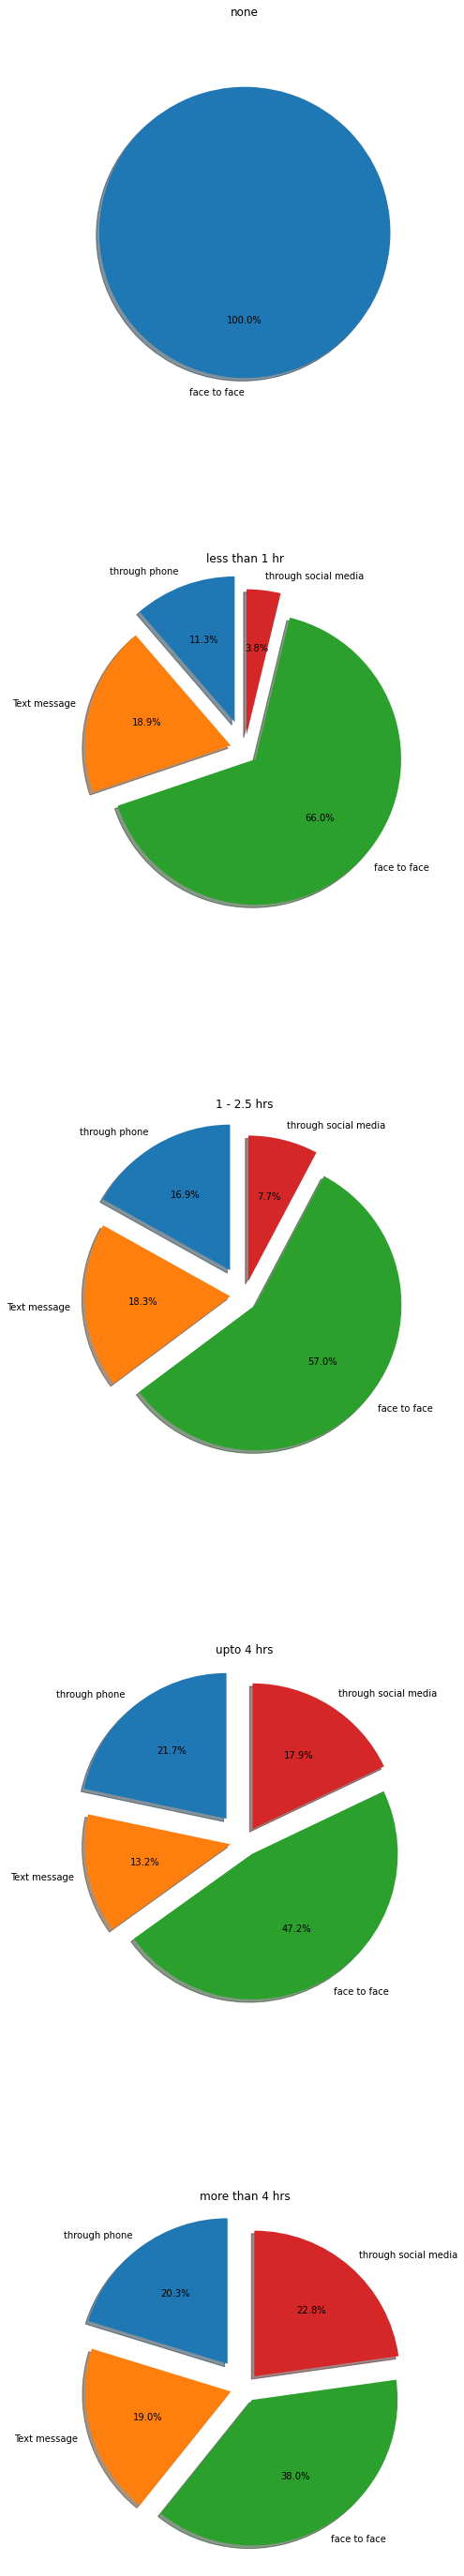

In [50]:

responses_41_groupby= responses_4_groupby.div(responses_4_groupby.sum(axis=1), axis=0)
def my_autopct(pct):
    return ('%1.1f%%'% pct) if pct > 0 else ''
fig, axs = plt.subplots(nrows=responses_41_groupby.index.size, ncols=1, figsize=(50,50))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

i=0
for row in range(responses_41_groupby.index.size ):
    count_list=[]
    name_list=[]
    [count_list.append(responses_41_groupby.loc[responses_41_groupby.index[row],:][i]) for i in range(len(responses_41_groupby.loc[responses_41_groupby.index[row],:])) if responses_41_groupby.loc[responses_41_groupby.index[row],:][i]>0]
    [name_list.append(responses_41_groupby.loc[responses_41_groupby.index[row],:].index[i]) for i in range(len(responses_41_groupby.loc[responses_41_groupby.index[row],:])) if responses_41_groupby.loc[responses_41_groupby.index[row],:][i]>0]
    fig.add_subplot(axs[row] )
    plt.pie(count_list, labels=name_list,autopct=my_autopct, explode=[0.2]+[0.1]*(len(name_list)-1),shadow=True, startangle=90)
    plt.axis('off')
    plt.title(responses_41_groupby.index[i])
    i=i+1
plt.savefig('figures/29.png')

### Compare NO. of people perfer certain communication base on hours spend on social media per day

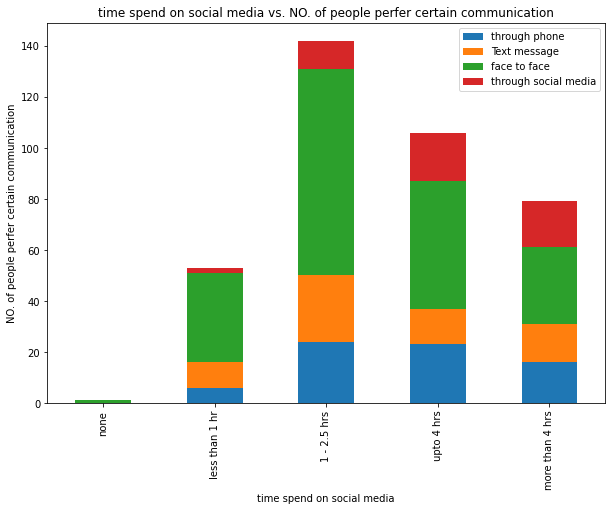

In [51]:

platform_stack=responses_4_groupby.plot.bar(stacked=True, figsize=(10,7),title="time spend on social media vs. NO. of people perfer certain communication")
platform_stack.set_xlabel("time spend on social media")
platform_stack.set_ylabel("NO. of people perfer certain communication")
plt.savefig('figures/30.png')



In [52]:
responses_df

,What is your age?,Which social media platform/s do you like the most or use the most?,How much time do you spend on social media in a day?,How much time do you spend on physical activities in a day?,How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?,Have you ever been a victim of any of these cyber crimes?,Which type of communication do you generally prefer?
0,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,3,Fake profiles,through phone
1,19,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,less than 1 hr,5,Photos being misused,Text message
2,19,"Whatsapp, Facebook, Instagram",upto 4 hrs,less than 1 hr,5,Hacking,through phone
3,19,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,less than 1 hr,2,None of the above,face to face
4,18,"Youtube, Instagram",upto 4 hrs,1 - 2.5 hrs,3,None of the above,Text message
...,...,...,...,...,...,...,...
286,19,"Whatsapp, Facebook, Youtube, Instagram, Hike",1 - 2.5 hrs,none,5,None of the above,"face to face, through social media"
287,18,Instagram,upto 4 hrs,1 - 2.5 hrs,10,None of the above,"through phone, through social media"
288,18,Whatsapp,1 - 2.5 hrs,1 - 2.5 hrs,4,Hacking,through social media
289,19,"Whatsapp, Youtube, Twitter",more than 4 hrs,less than 1 hr,3,None of the above,through social media


In [53]:
responses_df5=responses_df[["Have you ever been a victim of any of these cyber crimes?","How much time do you spend on social media in a day?"]]
responses_df5["Fake profiles"]=""
responses_df5["Photos being misused"]=""
responses_df5["Hacking"]=""
responses_df5["None of the above"]=""
responses_df5.head(7)

for index , row in responses_df5.iterrows():
    if "Fake profiles" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["Fake profiles"]=1
    else:
        row["Fake profiles"]=0
    if "Photos being misused" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["Photos being misused"]=1
    else:
        row["Photos being misused"]=0
    if "Hacking" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["Hacking"]=1
    else:
        row["Hacking"]=0
    if "None of the above" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["None of the above"]=1
    else:
        row["None of the above"]=0   
    
responses_df5.head()
    
    

C:\Users\ram\AppData\Local\Temp/ipykernel_14212/3196046796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_df5["Fake profiles"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/3196046796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_df5["Photos being misused"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/3196046796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Have you ever been a victim of any of these cyber crimes?,How much time do you spend on social media in a day?,Fake profiles,Photos being misused,Hacking,None of the above
0,Fake profiles,upto 4 hrs,1,0,0,0
1,Photos being misused,more than 4 hrs,0,1,0,0
2,Hacking,upto 4 hrs,0,0,1,0
3,None of the above,1 - 2.5 hrs,0,0,0,1
4,None of the above,upto 4 hrs,0,0,0,1


In [54]:
responses_df6=responses_df5[["How much time do you spend on social media in a day?","Fake profiles","Photos being misused","Hacking","None of the above"]]
responses_df6_g=responses_df6.groupby("How much time do you spend on social media in a day?")
responses_df6_groupby=responses_df6_g.sum()
print(responses_df6)
responses_df6_groupby=responses_df6_groupby.reindex(["none", "less than 1 hr", "1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"])
responses_df6_groupby

    How much time do you spend on social media in a day? Fake profiles  \
0                                           upto 4 hrs               1   
1                                      more than 4 hrs               0   
2                                           upto 4 hrs               0   
3                                          1 - 2.5 hrs               0   
4                                           upto 4 hrs               0   
..                                                 ...             ...   
286                                        1 - 2.5 hrs               0   
287                                         upto 4 hrs               0   
288                                        1 - 2.5 hrs               0   
289                                    more than 4 hrs               0   
290                                        1 - 2.5 hrs               0   

    Photos being misused Hacking None of the above  
0                      0       0                 0  
1    

,Fake profiles,Photos being misused,Hacking,None of the above
How much time do you spend on social media in a day?,,,,
none,1,0,0,1
less than 1 hr,9,1,2,38
1 - 2.5 hrs,18,5,7,98
upto 4 hrs,10,4,7,48
more than 4 hrs,8,2,4,41


In [55]:
responses_5=response_1[["Have you ever been a victim of any of these cyber crimes?","How much time do you spend on social media in a day?"]]
responses_5["Fake profiles"]=""
responses_5["Photos being misused"]=""
responses_5["Hacking"]=""
responses_5["None of the above"]=""
responses_5.head(7)

for index , row in responses_5.iterrows():
    if "Fake profiles" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["Fake profiles"]=1
    else:
        row["Fake profiles"]=0
    if "Photos being misused" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["Photos being misused"]=1
    else:
        row["Photos being misused"]=0
    if "Hacking" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["Hacking"]=1
    else:
        row["Hacking"]=0
    if "None of the above" in row['Have you ever been a victim of any of these cyber crimes?']:
        row["None of the above"]=1
    else:
        row["None of the above"]=0   
    
responses_5.head()

C:\Users\ram\AppData\Local\Temp/ipykernel_14212/833200688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_5["Fake profiles"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/833200688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responses_5["Photos being misused"]=""
C:\Users\ram\AppData\Local\Temp/ipykernel_14212/833200688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Have you ever been a victim of any of these cyber crimes?,How much time do you spend on social media in a day?,Fake profiles,Photos being misused,Hacking,None of the above
0,Fake profiles,upto 4 hrs,1,0,0,0
1,Photos being misused,more than 4 hrs,0,1,0,0
2,Hacking,upto 4 hrs,0,0,1,0
3,None of the above,1 - 2.5 hrs,0,0,0,1
4,None of the above,upto 4 hrs,0,0,0,1


In [56]:
responses_6=responses_5[["How much time do you spend on social media in a day?","Fake profiles","Photos being misused","Hacking","None of the above"]]
responses_6_g=responses_6.groupby("How much time do you spend on social media in a day?")
responses_6_groupby=responses_6_g.sum()
print(responses_6_groupby.index)
responses_6_groupby=responses_6_groupby.reindex(["none", "less than 1 hr", "1 - 2.5 hrs","upto 4 hrs","more than 4 hrs"])
responses_6_groupby

Index(['1 - 2.5 hrs', 'less than 1 hr', 'more than 4 hrs', 'none',
       'upto 4 hrs'],
      dtype='object', name='How much time do you spend on social media in a day?')


,Fake profiles,Photos being misused,Hacking,None of the above
How much time do you spend on social media in a day?,,,,
none,1,0,0,1
less than 1 hr,8,1,2,35
1 - 2.5 hrs,17,4,6,86
upto 4 hrs,10,3,7,46
more than 4 hrs,7,1,4,40


### Plot time spend on social media vs No. of people suffer from Fake profiles

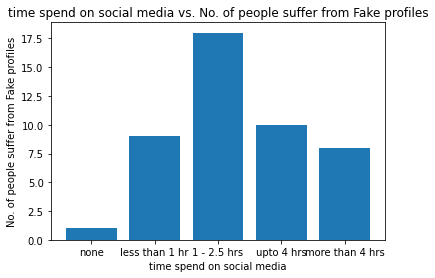

In [57]:

x_axis = np.arange(len(responses_df6_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df6_groupby[["Fake profiles"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df6_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from Fake profiles")
plt.title("time spend on social media vs. No. of people suffer from Fake profiles")
plt.savefig('figures/31.png')

### Plot time spend on social media vs No. of people suffer from Fake profiles with regression
### Plot regression line

The r-squared is: 0.38359763704583366
The pvalue is: 0.5238457443468619


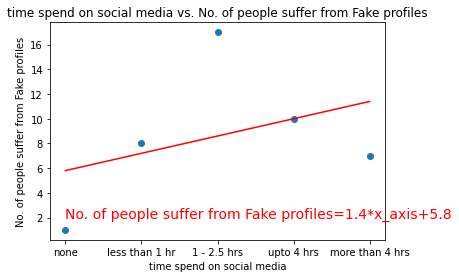

In [58]:

x_axis = np.arange(len(responses_6_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_6_groupby[["Fake profiles"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]



(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_6_groupby[["Fake profiles"]].to_numpy().tolist()])
linear_equation="No. of people suffer from Fake profiles="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,2),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_6_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from Fake profiles")
plt.title("time spend on social media vs. No. of people suffer from Fake profiles")
plt.savefig('figures/32.png')


### Plot time spend on social media vs No. of people suffer from Photos being misused

<Figure size 720x504 with 0 Axes>

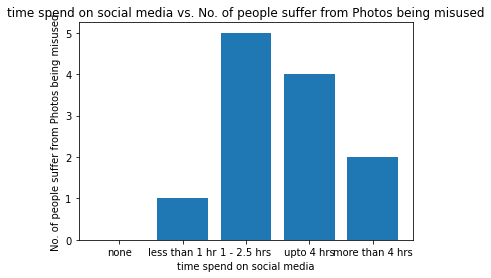

<Figure size 720x504 with 0 Axes>

In [59]:

x_axis = np.arange(len(responses_df6_groupby.index))
plt.bar(x_axis,[v[0] for v in responses_df6_groupby[["Photos being misused"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df6_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from Photos being misused")
plt.title("time spend on social media vs. No. of people suffer from Photos being misused")
plt.savefig('figures/33.png')
plt.figure(figsize=(10,7))


### Plot time spend on social media vs No. of people suffer from Photos being misused with regression
### Plot regression line

The r-squared is: 0.38490017945975047
The pvalue is: 0.5223146158470675


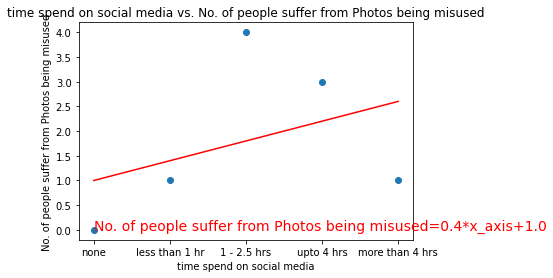

In [60]:

x_axis = np.arange(len(responses_6_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_6_groupby[["Photos being misused"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]



(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_6_groupby[["Photos being misused"]].to_numpy().tolist()])
linear_equation="No. of people suffer from Photos being misused="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,0),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_6_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from Photos being misused")
plt.title("time spend on social media vs. No. of people suffer from Photos being misused")
plt.savefig('figures/34.png')


### Plot time spend on social media vs No. of people suffer from Hacking

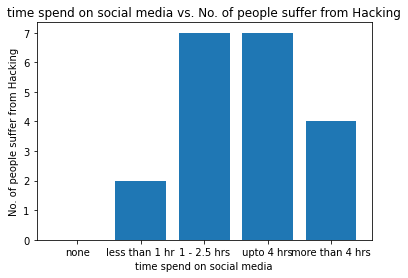

In [61]:

x_axis = np.arange(len(responses_df6_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df6_groupby[["Hacking"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df6_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from Hacking")
plt.title("time spend on social media vs. No. of people suffer from Hacking")
plt.savefig('figures/35.png')

### Plot time spend on social media vs No. of people suffer from Hacking with regression
### Plot regression line

The r-squared is: 0.7178049194865025
The pvalue is: 0.17213200998306302


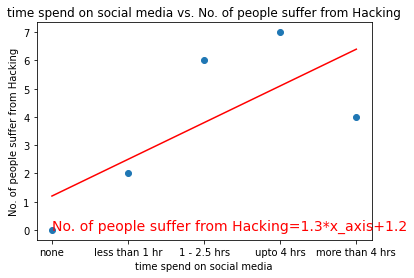

In [62]:

x_axis = np.arange(len(responses_6_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_6_groupby[["Hacking"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]


(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_6_groupby[["Hacking"]].to_numpy().tolist()])
linear_equation="No. of people suffer from Hacking="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,0),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_6_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from Hacking")
plt.title("time spend on social media vs. No. of people suffer from Hacking")
plt.savefig('figures/36.png')

### Plot time spend on social media vs No. of people suffer from other cyber crimes

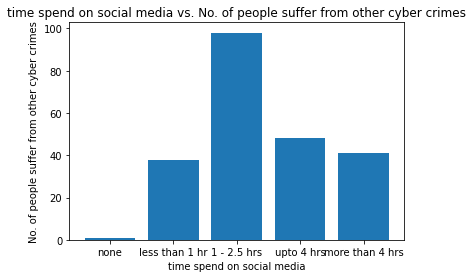

In [67]:

x_axis = np.arange(len(responses_df6_groupby.index))
Youtube_plot=plt.bar(x_axis,[v[0] for v in responses_df6_groupby[["None of the above"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [j for j in responses_df6_groupby.index])
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from other cyber crimes")
plt.title("time spend on social media vs. No. of people suffer from other cyber crimes")
plt.savefig('figures/37.png')

### Plot time spend on social media vs No. of people suffer from other cyber crimes with regression
### Plot regression line

The r-squared is: 0.46361713132596477
The pvalue is: 0.4315911476335936


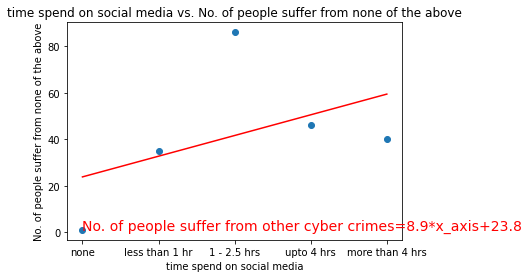

In [63]:

x_axis = np.arange(len(responses_6_groupby.index))
plt.scatter(x_axis,[v[0] for v in responses_6_groupby[["None of the above"]].to_numpy().tolist()])
tick_locations = [value for value in x_axis]



(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_axis,[v[0] for v in responses_6_groupby[["None of the above"]].to_numpy().tolist()])
linear_equation="No. of people suffer from other cyber crimes="+str(round(slope,2))+"*"+"x_axis"+"+"+str(round(intercept,2))
reg_value=slope*x_axis+intercept
plt.plot(x_axis,reg_value,"r-")
plt.annotate(linear_equation,(0,1),color="red",fontsize=14)
plt.xticks(tick_locations, [j for j in responses_6_groupby.index])


print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
plt.xlabel("time spend on social media")
plt.ylabel("No. of people suffer from none of the above")
plt.title("time spend on social media vs. No. of people suffer from none of the above")
plt.savefig('figures/38.png')


### Share of type of cyber crime faced base on people's usual hour spend on social media per day

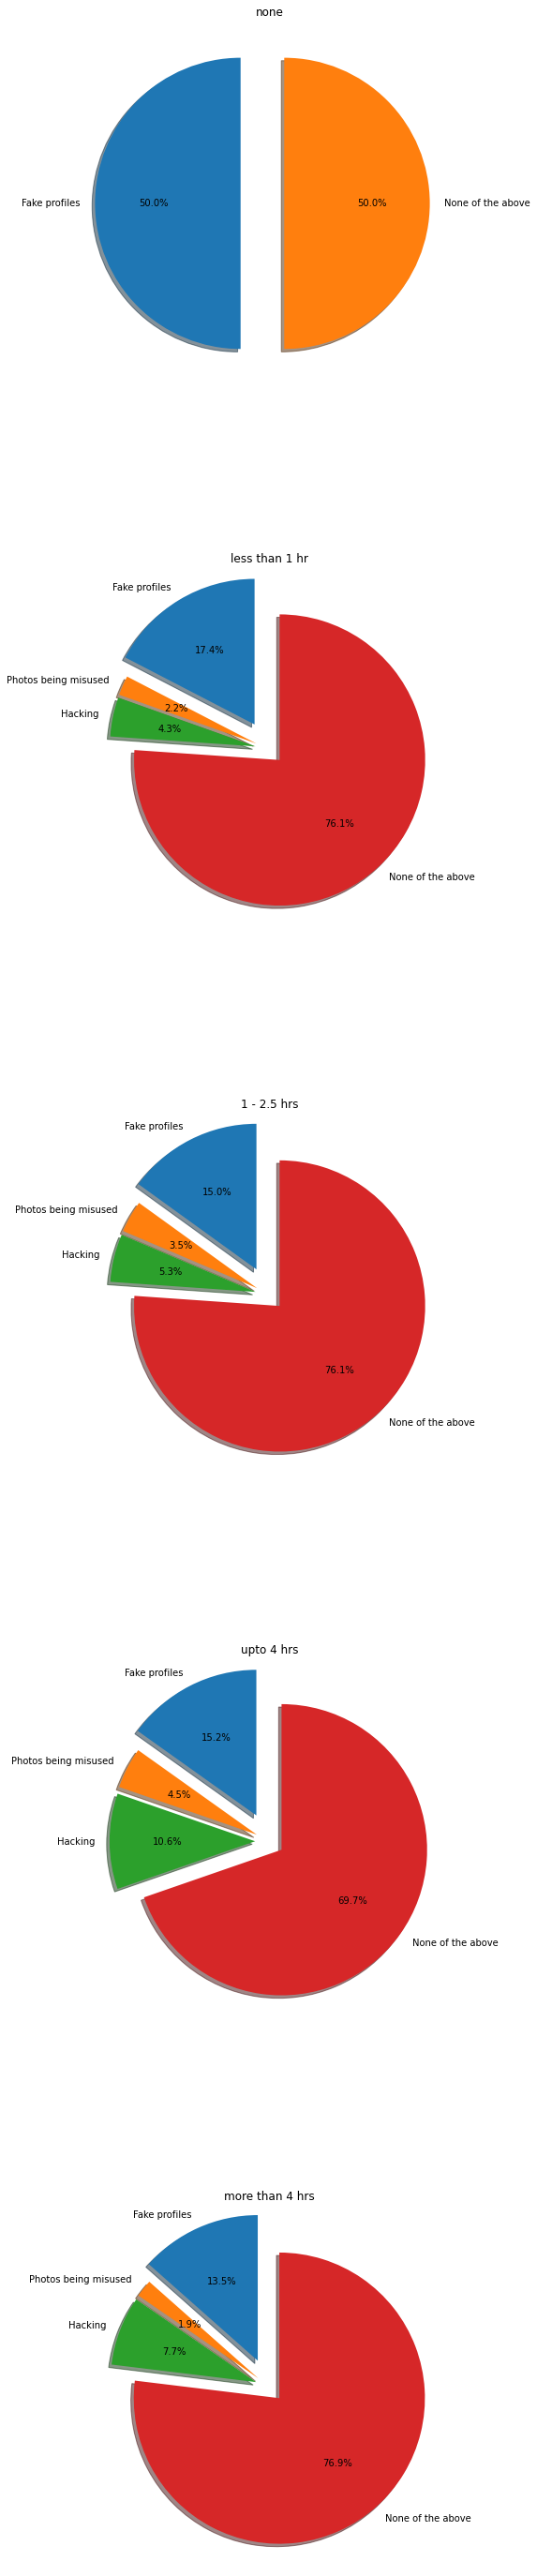

In [64]:

responses_61_groupby= responses_6_groupby.div(responses_6_groupby.sum(axis=1), axis=0)
def my_autopct(pct):
    return ('%1.1f%%'% pct) if pct > 0 else ''
fig, axs = plt.subplots(nrows=responses_61_groupby.index.size, ncols=1, figsize=(50,50))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

i=0
for row in range(responses_61_groupby.index.size ):
    count_list=[]
    name_list=[]
    [count_list.append(responses_61_groupby.loc[responses_61_groupby.index[row],:][i]) for i in range(len(responses_61_groupby.loc[responses_61_groupby.index[row],:])) if responses_61_groupby.loc[responses_61_groupby.index[row],:][i]>0]
    [name_list.append(responses_61_groupby.loc[responses_61_groupby.index[row],:].index[i]) for i in range(len(responses_61_groupby.loc[responses_61_groupby.index[row],:])) if responses_61_groupby.loc[responses_61_groupby.index[row],:][i]>0]
    fig.add_subplot(axs[row] )
    plt.pie(count_list, labels=name_list,autopct=my_autopct, explode=[0.2]+[0.1]*(len(name_list)-1),shadow=True, startangle=90)
    plt.axis('off')
    plt.title(responses_61_groupby.index[i])
    i=i+1
plt.savefig('figures/39.png')

### Compare NO. of people suffer from certain cyber base on hours spend on social media per day

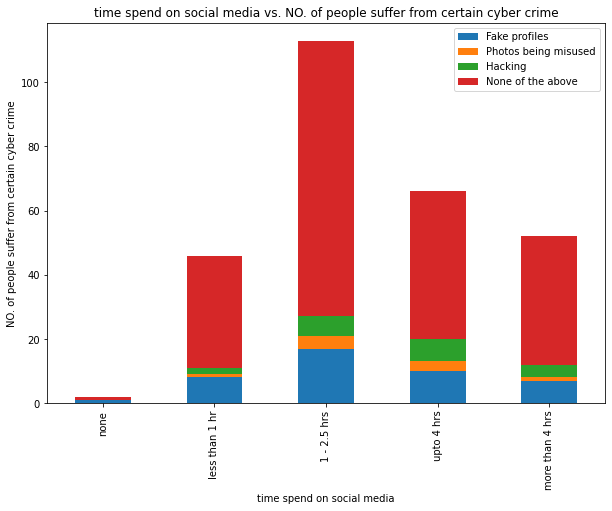

In [65]:

platform_stack=responses_6_groupby.plot.bar(stacked=True, figsize=(10,7),title="time spend on social media vs. NO. of people suffer from certain cyber crime")
platform_stack.set_xlabel("time spend on social media")
platform_stack.set_ylabel("NO. of people suffer from certain cyber crime")
plt.savefig('figures/40.png')


### bar chart of respondents exposure to crime, what type of crime

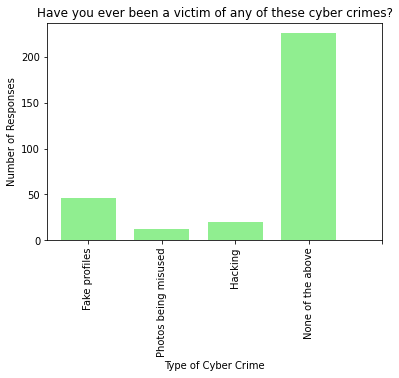

In [66]:

crime_type=['Fake profiles','Photos being misused','Hacking','None of the above']
numb_resps=[responses_df5['Fake profiles'].sum(),responses_df5['Photos being misused'].sum(),responses_df5['Hacking'].sum(),responses_df5['None of the above'].sum()]
plt.bar(crime_type,numb_resps, color="lightgreen", align="center", width = 0.75)
plt.title("Have you ever been a victim of any of these cyber crimes?")
tick_locations = [value for value in x_axis]
plt.xticks(ticks=tick_locations, label=list(crime_type), rotation="vertical")
plt.xlabel("Type of Cyber Crime")
plt.ylabel("Number of Responses")
plt.savefig('figures/41.png')
plt.show()

### bar chart of respondents of preferred communication 

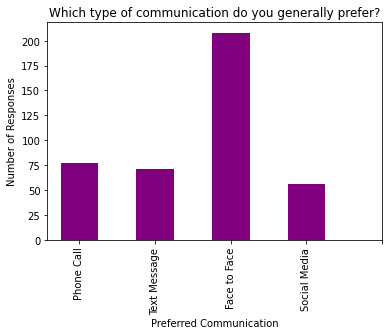

In [67]:

comm_list=['Phone Call','Text Message','Face to Face','Social Media']
comm_resps=[responses_df3['through phone'].sum(),responses_df3['Text message'].sum(),responses_df3['face to face'].sum(),responses_df3['through social media'].sum()]
plt.bar(comm_list,comm_resps, color="purple", align="center", width = 0.5)
plt.title("Which type of communication do you generally prefer?")
tick_locations = [value for value in x_axis]
plt.xticks(ticks=tick_locations, label=list(comm_list), rotation="vertical")
plt.xlabel("Preferred Communication")
plt.ylabel("Number of Responses")
plt.savefig('figures/42.png')
plt.show()

### Creating a pie chart considering respondent age (14 to 23)

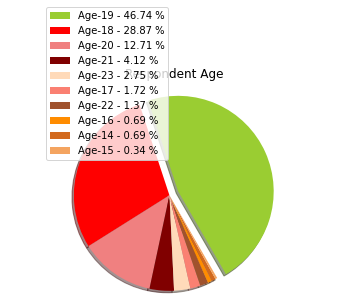

<Figure size 4320x7200 with 0 Axes>

In [68]:

age_df = responses_df['What is your age?']
age_details = ["Age-19", "Age-18", "Age-20", "Age-21", "Age-23", "Age-17", "Age-22", "Age-16", "Age-14", "Age-15"]
count = [136, 84, 37, 12, 8, 5, 4, 2, 2, 1]
colors = ["yellowgreen", "red", "lightcoral", "maroon", "peachpuff", "salmon", "sienna", "darkorange", "chocolate", "sandybrown"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
b = sum(count)
percent = [100*y/b for y in count]

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(age_details, percent)]

plt.title("Respondent Age")
plt.pie(count, explode=explode, colors=colors, shadow=True, startangle=300)
plt.axis("equal")
plt.legend(labels=labels, loc="center left", bbox_to_anchor=(0.1, 1.))
plt.savefig('figures/43.png')
plt.figure(figsize=(60,100))
plt.show()


### Creating a pie chart considering respondent age (18 to 21)

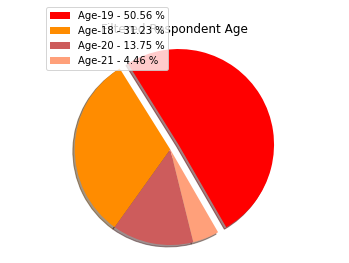

<Figure size 4320x7200 with 0 Axes>

In [69]:

age_details = ["Age-19", "Age-18", "Age-20", "Age-21"]
count = [136,84,37, 12]
colors = ["red", "darkorange", "indianred", "lightsalmon"]
explode = (0.1, 0, 0, 0)
b = sum(count)
percent = [100*y/b for y in count]

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(age_details, percent)]

plt.title("Filtered Respondent Age")
plt.pie(count, explode=explode, colors=colors, shadow=True, startangle=300)
plt.axis("equal")
plt.legend(labels=labels, loc="center left", bbox_to_anchor=(0.1, 1.))
plt.savefig('figures/44.png')
plt.figure(figsize=(60,100))
plt.show()

### Creating a pie chart considering respondent age (18 to 21) for time spent online on social media

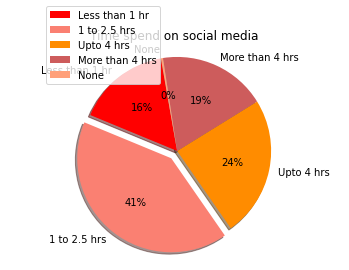

<Figure size 2880x2880 with 0 Axes>

In [70]:

time_spend_online_1 = response_1['How much time do you spend on social media in a day?']
time_details_1 = ["Less than 1 hr", "1 to 2.5 hrs", "Upto 4 hrs", "More than 4 hrs", "None"]
count = [43,110,65,50,1]
colors = ["red", "salmon", "darkorange", "indianred", "lightsalmon"]
explode = (0, 0.1, 0, 0,0)
plt.title("Time spend on social media")
plt.pie(count, explode=explode, labels=time_details_1, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.legend(loc="center left", bbox_to_anchor=(0.1, 1.))
plt.savefig('figures/45.png')
plt.figure(figsize=(40,40))
plt.show()

### Creating a pie chart considering respondent age (18 to 21) for time spent offline on physical activity

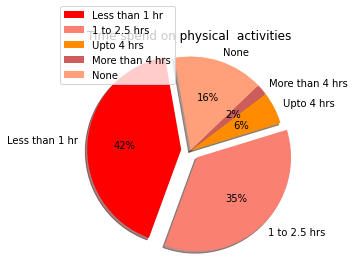

<Figure size 2880x2880 with 0 Axes>

In [71]:

time_spend_online_1 = response_1['How much time do you spend on physical activities in a day?']
time_details_1 = ["Less than 1 hr", "1 to 2.5 hrs", "Upto 4 hrs", "More than 4 hrs", "None"]
count = [112,95,15,5,42]
colors = ["red", "salmon", "darkorange", "indianred", "lightsalmon"]
explode = (0.1, 0.1, 0, 0,0)
plt.title("Time spend on physical  activities")
plt.pie(count, explode=explode, labels=time_details_1, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.legend(loc="center left", bbox_to_anchor=(0.1, 1.))
plt.savefig('figures/46.png')
plt.figure(figsize=(40,40))
plt.show()